<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/4_Primeros_algoritmos_en_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

En esta sesión veremos algunos algoritmos relacionados con árboles, en algunos casos supondremos que el árbol tiene una raíz, lo que nos permitirá manejar las cosas con mayor facilidad, o preguntarnos cosas específicas como la altura de un árbol con raíz.

**Encontrando hojas.** Dado un árbol, encuentra las hojas de este. (Recuerda que las hojas son aquellos vértices que tienen un único vecino)

[(0, 7), (0, 2), (1, 5), (2, 4), (2, 6), (2, 8), (2, 9), (3, 6), (4, 5)]
1
3
7
8
9


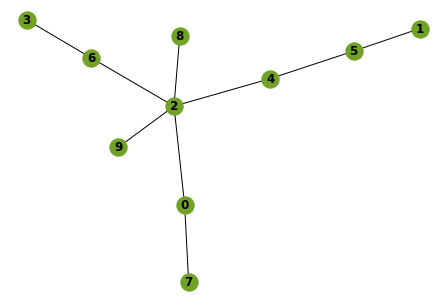

In [ ]:
G = nx.random_tree(10)
nx.draw(G, with_labels=True, font_weight='bold', node_color='#71A125')
print(G.edges)


for v in G.nodes : 
  if G.degree[v] == 1:
    print(v)

Como las hojas tienen un único vecino, su grado es $1$, por lo que podemos aprovechar la función *degree* de la librería con la que estamos trabajando. Lo que hacemos es iterar sobre cada vértice del árbol y verificar si su grado es $1$, y en caso de serlo, lo imprimimos.

**Búsqueda en profundidad (DFS).** Este algoritmo nos permite recorrer la gráfica por profundidad, es decir, dado un vértice inicial $v$, recorre a un vecino y se sigue por un camino sin ciclo hasta que ya no pueda más, y va regresando a visitar a los vértices que dejó en el camino. 

El recorrido de este algoritmo nos da un árbol, comunmente llamado árbol de DFS, que suele ser muy útil.

Escribiremos un código por nuestra cuenta, sin hacer uso de algoritmos en la librería NetworkX para entenderlo a profundidad.

[(0, 3), (0, 6), (1, 2), (1, 3), (1, 4), (1, 5), (3, 5), (4, 7), (6, 7)] 

0
3
1
2
4
7
6
5


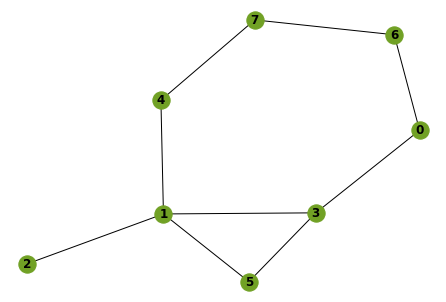

In [ ]:
n = 8
p = 1/3

G = nx.gnp_random_graph(n, p)
print(G.edges, '\n')
nx.draw(G, with_labels=True, font_weight='bold', node_color='#71A125')

vis = [0]*n

def dfs(v):
  vis[v] = 1
  print(v)
  for u in G.adj[v]:
    if vis[u] == 0 :
      dfs(u)
  return

dfs(0)

**Altura de un árbol.** Encontremos la altura de un árbol usando DFS. Supondremos que la raíz es el vértice $0$.

[(0, 4), (1, 2), (2, 3), (2, 4)]
3
[0, 3, 2, 3, 1]


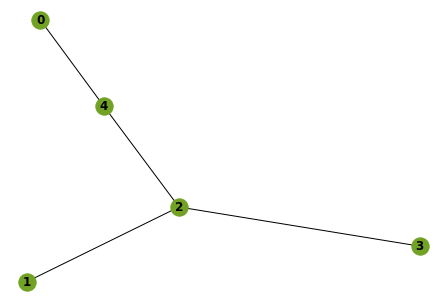

In [ ]:
n = 5
T = nx.random_tree(n)
print(T.edges)
nx.draw(T, with_labels=True, font_weight='bold', node_color='#71A125')

# h guarda la altura del vértice en el árbol, y m la mayor altura vista
h = [-1]*n
m = 0

def dfst(v):
  global m
  for u in T.adj[v]:
    if h[u] == -1 :
      h[u] = h[v] + 1
      if m < h[u] :
        m = h[u]
      dfst(u)
  return

h[0] = 0
dfst(0)
print(m)
print(h)


**Búsqueda en anchura (BFS).** Este algoritmos nos permite, a partir de cierto vértice recorrer la gráfica por anchura, es decir, irnos expandiendo a partir de un vértices inicial $v$, primero se visitan los vértices vecinos a $v$, después los vecinos de sus vecinos, y así sucesivamente. Esto en particular nos permite conocer la distancia del vértice $v$ a cualquier otro vértice de la gráfica (DFS no lo permite). 

En particular, el recorrido que se hace con este algoritmo nos da un árbol generador de la componente conexa en la que se encuentra el vértice de donde partimos.

Escribiremos un código por nuestra cuenta, por momento sin hacer uso de algoritmos de la librería NetworkX. Para esto, necesitaremos usar una estructura, una cola, cuya cualidad es que el primer objeto en ser insertado es el primero en ser eliminado, coloquialmente se dice que funciona como la fila de las tortillas, pues el primero en llegar es el primero en salir, y así sucesivamente.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 3), (0, 4), (0, 7), (1, 3), (1, 5), (1, 7), (1, 8), (2, 3), (2, 6), (3, 8), (4, 6), (4, 9), (5, 6), (5, 8), (5, 9)] 

0
1
3
4
7
5
8
2
6
9




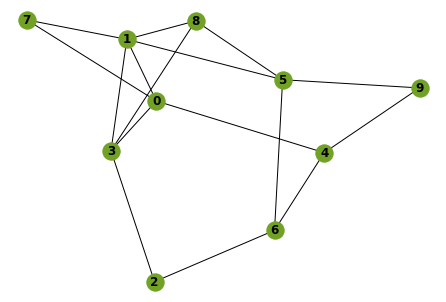

In [ ]:
from collections import deque 

n = 10
p = 0.25

G = nx.gnp_random_graph(n, p)
print(G.nodes)
print(G.edges, '\n')
nx.draw(G, with_labels=True, font_weight='bold', node_color='#71A125')

vis = [0]*n

def bfs(v):
  q = deque()
  vis[v] = 1
  q.append(v)
  while(q):
    u = q.popleft()
    print(u)
    for w in G.adj[u]:
      if vis[w] == 0:
        vis[w] = 1
        q.append(w)
  print('\n')
  return
    
bfs(0)

Dado que cada vértice y cada arista se recorre a lo más una vez en este algoritmo, podemos concluir que su complejidad es $O(n + m)$, donde $n$ es la cantidad de vértices y $m$ de aristas.

**Ejercicios.** 

Para los siguientes ejercicios, crea primero una gráfica de forma aleatoria, donde uses la probabilidad que desees sobre las aristas.

1.   Usando DFS, determina cuántas componentes conexas tiene la gráfica.
2.   Escribe un código que permita encontrar la distancia del vértice $0$ a cualquier otro vértice de la gráfica (regresa $-1$ si no pertenecen a la misma componenete conexa).



In [ ]:
n = 12
p = 0.25
G = nx.gnp_random_graph(n, p)

*Ejercicio 1.* Nota que al ejecutar dfs(0) en el código visto en clase, $vis[v]$ cambia si y solo si $v$ está en la componente conexa de $0$. Entonces, si se itera sobre los vértices de la gráfica y hacemos dfs en los vértices en los que $vis[v] = 0$, cada que encontramos un vértice de estos estaremos entrando a una nueva componente conexa. Escribe aquí tu código para determinar cuántas componentes conexas tiene $G$.

Compara tu resultado obtenido con que imprime el siguiente código, que utiliza herramientas de la librería NetworkX.

In [ ]:
print(nx.number_connected_components(G)) #Imprime el total de componentes conexas
for c in nx.connected_components(G):
  print(c) #Imprime los vértices de cada componente conexa

2
{0}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


*Ejercicio 2.* Modifica el código visto en clase, de modo que $vis$ cambie por $dist$, donde en lugar de sólo guardar si ya se vió el vértice o no, guardes la distancia del vértice en cuestión con el vértice $0$, usando que si $u$ es vecino de $v$, y no hemos metido a $u$ previemente en la cola, entonces la distancia de $u$ a $0$ es igual a la distancia de $v$ a $0$ más $1$: $dist[u] = dist[v] + 1$. Escribe tu código en la siguiente celda, por cada vértice, imprime su distancia con el vértice $0$.

Compara tu resultado con el siguiente código, que usando herramientas de la librería NetworkX nos permite saber las distancias de los vértices de la gráfica al vértice $0$.

In [ ]:

for d in range (0, n): # Checamos del 0 al n, pues la mayor distancia que puede haber es n-1
  if len(nx.descendants_at_distance(G, 0, d)) > 0:
    print("A distancia", d, "son:", nx.descendants_at_distance(G, 0, d))
    # nx.descendants_at_distance nos devuelve un set con los vértices a distancia d de 0


A distancia 0 son: {0}
